In [1]:
# !jupyter nbextension enable --py gmaps

In [2]:
import coffee
from coffee.config import conf
import gmaps
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
conf.configure_env("Prod", "./data")
conf.import_keys()
gmaps.configure(api_key=conf.google.maps_api_key)


In [4]:
# configure google docs access
client = conf.google.get_client()
coffee_doc = client.open_by_key(conf.runtime.coffee_doc_id)

roasts = coffee.util.read_tab_as_df(coffee_doc, 'Roasting Method', col_types={'Batch': int}, index_col=['Batch'], date_cols=['Roasted on'], num_columns=19)
roasts


,Coffee bean,SKU,Roasted on,Quantity (grams),Temperature,Quantity Out (g),Quantity Out (Percentage),Program,"Time, Program (min)",Deviation (time delta to program),Cooldown Program,"Time, Cooldown",Temp A @ Cooldown (F),Temp B @ Cooldown (F),Color,Total Time (s),Roasting notes,Tasting notes
Batch,,,,,,,,,,,,,,,,,,
1,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-09,114.1,67F,96.5,0.85,P2,8.5,42.0,"Manual P2, Fast Drum",90.0,NaN,NaN,8.0,642.0,Much chaff in the cracks,NaN
2,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-15,114.2,67F,96.7,0.85,P2,8.5,27.0,"Manual P2, Fast Drum",90.0,NaN,NaN,8.0,627.0,Much chaff in the cracks,NaN
3,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-23,114.2,67F,97.4,0.85,P2,8.5,59.0,"Manual P1, Slow Drum",90.0,NaN,NaN,11.0,659.0,Some chaff in the cracks,"Light flavor less grassy, more full back taste"
4,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-24,228.5,67F,193.7,0.85,P2,12.0,83.0,"Manual P1, Slow Drum",130.0,NaN,NaN,11.0,933.0,Some chaff in the cracks,NaN
5,Sweet Maria's Altiplano Blend,FirstOrder-1,2018-12-01,114.1,67F,97.5,0.85,P2,8.5,27.0,"Manual P2, Fast Drum",90.0,NaN,NaN,NaN,627.0,NaN,NaN
6,Sweet Maria's Altiplano Blend,FirstOrder-1,2018-12-04,114.0,67F,95.6,0.84,P2,8.5,29.0,Auto,90.0,NaN,NaN,NaN,629.0,NaN,A bit burned
7,Sweet Maria's Altiplano Blend,FirstOrder-1,2018-12-08,251.9,67F,216.4,0.86,P2,12.0,57.0,"Manual P2, Fast Drum",130.0,NaN,NaN,NaN,907.0,NaN,NaN
8,Ethiopia Debub Merab SWP Decaf,GCX-5734,2018-11-22,114.1,67F,98.3,0.86,P2,8.5,-1.0,"Manual P2, Fast Drum",90.0,NaN,NaN,NaN,599.0,NaN,Sweet but a little hollow
9,Ethiopia Debub Merab SWP Decaf,GCX-5734,2018-11-23,115.1,67F,100.0,0.87,P2,8.5,5.0,"Manual P1, Fast Drum",90.0,NaN,NaN,NaN,605.0,NaN,NaN


In [5]:
outws = coffee.util.read_tab_as_df(coffee_doc, 'geo results')
outws

bought_coffees = outws[['source', 'latitude', 'longitude', 'elevation_m']]
roasted_coffee = roasts[['Coffee bean', 'Roasted on', 'Quantity (grams)', 'Total Time (s)']]
roasted_coffee = roasted_coffee.groupby('Coffee bean').sum()
combined = pd.merge(roasted_coffee, bought_coffees, left_on='Coffee bean', right_on='source')
combined


,Quantity (grams),Total Time (s),source,latitude,longitude,elevation_m
0,348.3,1563.0,Colombia Urrao Valle Penderisco,6.476160,-76.340409,874.271
1,371.9,553.0,Costa Rica Chirripo La Fila,9.484624,-83.488587,3763.670
2,1485.6,6421.0,Ethiopia Agaro Kedamai Cooperative,7.857034,36.582394,1686.943
3,471.8,2095.0,Ethiopia Debub Merab SWP Decaf,7.857034,36.582394,1686.943
4,461.3,1990.0,Ethiopia Gr. 1 Dry Process Guji Ketuma,9.066667,35.500000,1503.572
5,341.7,1313.0,Mexico Organic Grupo de Bella Vista,16.756932,-93.129235,540.000
6,480.0,2163.0,Sweet Maria's Altiplano Blend,37.820753,-122.282247,5.377
7,229.0,1256.0,"Sweet Maria's Decaf Espresso ""Donkey"" Blend",37.820753,-122.282247,5.377
8,226.5,1125.0,Sweet Maria's Ethiopiques Blend,37.820753,-122.282247,5.377
9,360.4,1386.0,Sweet Maria's New Classic Espresso Blend,37.820753,-122.282247,5.377


In [6]:
fig = gmaps.figure(map_type='HYBRID')
weight_layer = gmaps.heatmap_layer(combined[['latitude', 'longitude']], weights=combined['Quantity (grams)'])
weight_layer.point_radius = 10
weight_layer.max_intensity = 80
weight_layer.gradient = [
    (0,0,0,0),
    (64, 0, 0, 0.7),
    (200, 0, 0, 0.9)
]
time_layer = gmaps.heatmap_layer(combined[['latitude', 'longitude']], weights=combined['Total Time (s)'])
time_layer.gradient = [
    (0,0,0,0),
    (0, 0, 0, 0.7),
    (255, 255, 102, 0.9)
]

fig.add_layer(weight_layer)
fig.add_layer(time_layer)
fig


Figure(layout=FigureLayout(height='420px'))

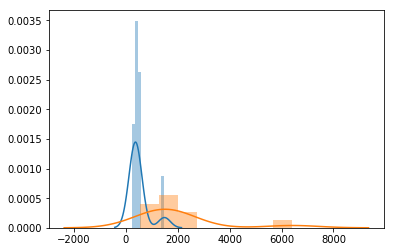

In [7]:
g = sns.distplot(roasted_coffee['Quantity (grams)'].values)
h = sns.distplot(roasted_coffee['Total Time (s)'].values)


/Users/mcclure/.local/share/virtualenvs/coffee-NNGHTqVB/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


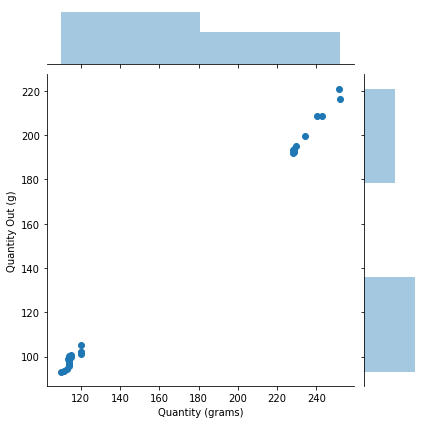

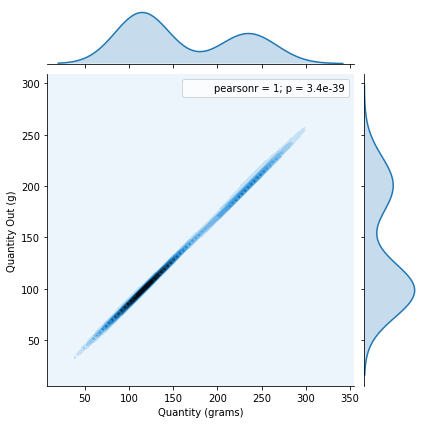

In [8]:
import scipy.stats as stats
roastings = roasts[['Quantity (grams)', 'Quantity Out (g)']]
sns.jointplot("Quantity (grams)", "Quantity Out (g)", data=roasts, kind='scatter')
plot_kde = sns.jointplot("Quantity (grams)", "Quantity Out (g)", data=roasts, kind='kde')
plot_kde.annotate(stats.pearsonr)
plt.show()

/Users/mcclure/.local/share/virtualenvs/coffee-NNGHTqVB/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mcclure/.local/share/virtualenvs/coffee-NNGHTqVB/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


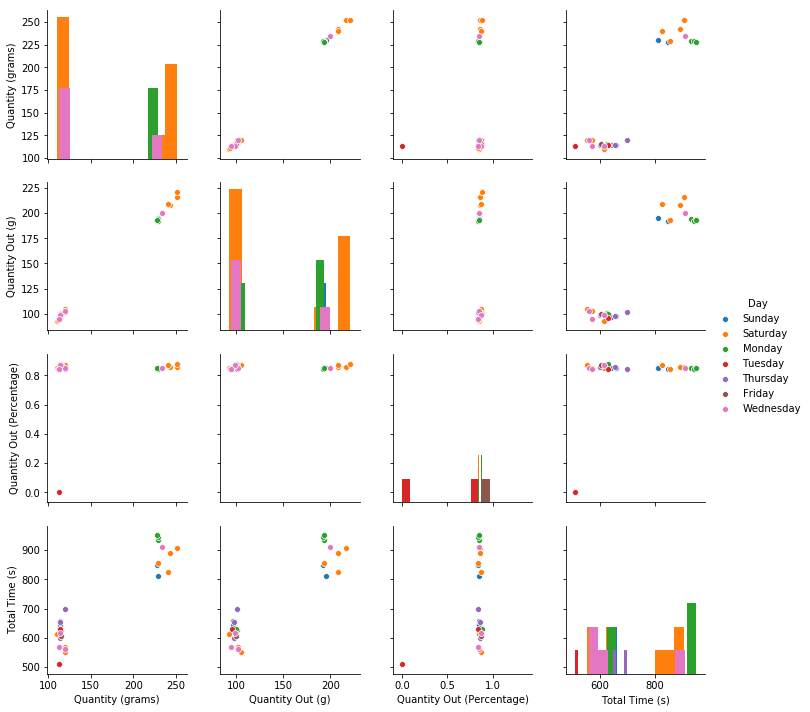

In [9]:
roasts['Day'] = roasts['Roasted on'].dt.day_name()
roasts
sns.pairplot(roasts[['Quantity (grams)', 'Quantity Out (g)', 'Quantity Out (Percentage)', 'Total Time (s)', 'Day']], diag_kind='hist', hue='Day')


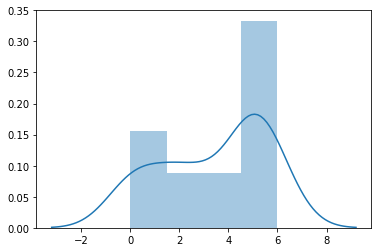

In [10]:
sns.distplot(roasts['Roasted on'].dt.dayofweek.values)

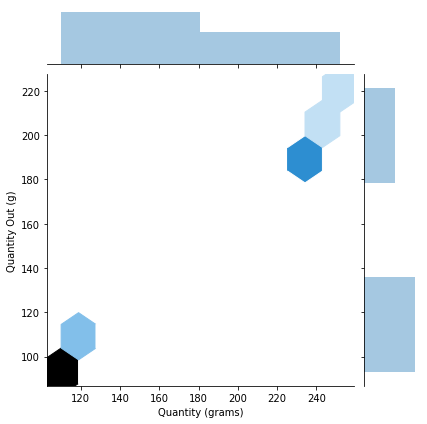

In [15]:
sns.jointplot("Quantity (grams)", "Quantity Out (g)", data=roasts, kind='hex', joint_kws={'gridsize': 8})
